# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
## Generate Cities List

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
city_name = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")



City not found. Skipping...
Processing Record 1 of Set 1 : atuona
City not found. Skipping...
Processing Record 2 of Set 1 : barrow
City not found. Skipping...
Processing Record 3 of Set 1 : bredasdorp
Processing Record 4 of Set 1 : ilulissat
Processing Record 5 of Set 1 : dunda
City not found. Skipping...
Processing Record 6 of Set 1 : norman wells
Processing Record 7 of Set 1 : vaini
Processing Record 8 of Set 1 : provideniya
Processing Record 9 of Set 1 : forio
Processing Record 10 of Set 1 : vilcun
Processing Record 11 of Set 1 : albany
Processing Record 12 of Set 1 : dandong
Processing Record 13 of Set 1 : kavieng
City not found. Skipping...
Processing Record 14 of Set 1 : lebu
Processing Record 15 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 16 of Set 1 : isangel
Processing Record 17 of Set 1 : zenzeli
Processing Record 18 of Set 1 : faanui
Processing Record 19 of Set 1 : new norfolk
Processing Record 20 of Set 1 : bonavista
Processing Record 21 of Set 1 : mat

Processing Record 35 of Set 4 : oktyabrskoye
Processing Record 36 of Set 4 : cayenne
City not found. Skipping...
Processing Record 37 of Set 4 : tanout
Processing Record 38 of Set 4 : saint andrews
Processing Record 39 of Set 4 : hasaki
Processing Record 40 of Set 4 : san policarpo
Processing Record 41 of Set 4 : chengdu
Processing Record 42 of Set 4 : bilibino
Processing Record 43 of Set 4 : durazno
City not found. Skipping...
Processing Record 44 of Set 4 : sinegorskiy
Processing Record 45 of Set 4 : saint-philippe
Processing Record 46 of Set 4 : qurayyat
Processing Record 47 of Set 4 : mountain home
Processing Record 48 of Set 4 : porto novo
Processing Record 49 of Set 4 : sayyan
Processing Record 50 of Set 4 : katsuura
Processing Record 0 of Set 5 : bud
Processing Record 1 of Set 5 : deputatskiy
Processing Record 2 of Set 5 : karema
Processing Record 3 of Set 5 : mianyang
Processing Record 4 of Set 5 : torbay
Processing Record 5 of Set 5 : nishihara
Processing Record 6 of Set 5 : s

Processing Record 17 of Set 8 : nyurba
Processing Record 18 of Set 8 : fortuna
Processing Record 19 of Set 8 : srednekolymsk
Processing Record 20 of Set 8 : aranos
Processing Record 21 of Set 8 : tuy hoa
Processing Record 22 of Set 8 : salinas
Processing Record 23 of Set 8 : hoi an
Processing Record 24 of Set 8 : port hedland
Processing Record 25 of Set 8 : bayir
Processing Record 26 of Set 8 : lumsden
Processing Record 27 of Set 8 : sakakah
Processing Record 28 of Set 8 : santa cruz
Processing Record 29 of Set 8 : magadi
Processing Record 30 of Set 8 : kijang
Processing Record 31 of Set 8 : vincennes
Processing Record 32 of Set 8 : pisco
Processing Record 33 of Set 8 : bulgan
Processing Record 34 of Set 8 : fengcheng
Processing Record 35 of Set 8 : ambunti
City not found. Skipping...
Processing Record 36 of Set 8 : kurilsk
Processing Record 37 of Set 8 : maldonado
Processing Record 38 of Set 8 : avera
Processing Record 39 of Set 8 : kikwit
Processing Record 40 of Set 8 : acarau
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [17]:
# Count data
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [23]:
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hambantota,40,LK,1619896282,100,6.1241,81.1185,78.80,3.44
1,Panabá,6,MX,1619896282,28,21.2833,-88.2667,97.68,13.11
2,Pozo Colorado,0,PY,1619896283,26,-23.4923,-58.7972,90.00,6.53
3,Atuona,0,PF,1619896283,73,-9.8000,-139.0333,78.66,9.46
4,Clyde River,40,CA,1619896284,100,70.4692,-68.5914,19.40,2.42
...,...,...,...,...,...,...,...,...,...
536,Dunedin,5,NZ,1619896366,51,-45.8742,170.5036,47.57,6.91
537,Maceió,40,BR,1619896434,69,-9.6658,-35.7353,80.60,10.36
538,Laguna,1,US,1619896542,40,38.4210,-121.4238,77.00,5.75
539,Ferzikovo,76,RU,1619896543,70,54.5191,36.7567,42.80,5.61


In [18]:
weather_df.to_csv("output_data/cities.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

In [19]:
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,9,PF,1619920857,68,-9.8000,-139.0333,79.74,7.99
1,Barrow,90,US,1619920857,79,71.2906,-156.7887,21.20,13.80
2,Bredasdorp,3,ZA,1619920858,87,-34.5322,20.0403,42.80,3.94
3,Ilulissat,9,GL,1619920859,75,69.2167,-51.1000,35.60,4.61
4,Dunda,33,TZ,1619920859,96,-8.1167,34.2500,61.59,1.23


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    556.000000
mean      69.929856
std       21.362604
min        1.000000
25%       59.000000
50%       74.500000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [21]:
#  Get the indices of cities that have humidity over 100%.
#there are no values greater than 100% in our data

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df

In [23]:

clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,9,PF,1619920857,68,-9.8000,-139.0333,79.74,7.99
1,Barrow,90,US,1619920857,79,71.2906,-156.7887,21.20,13.80
2,Bredasdorp,3,ZA,1619920858,87,-34.5322,20.0403,42.80,3.94
3,Ilulissat,9,GL,1619920859,75,69.2167,-51.1000,35.60,4.61
4,Dunda,33,TZ,1619920859,96,-8.1167,34.2500,61.59,1.23
...,...,...,...,...,...,...,...,...,...
551,Zelenoborsk,100,RU,1619921106,90,61.4669,64.0333,43.99,6.96
552,Camaná,8,PE,1619921106,84,-16.6228,-72.7111,67.06,6.98
553,Preobrazheniye,2,RU,1619921106,56,42.9019,133.9064,52.63,2.24
554,Labuhan,86,ID,1619921107,77,-6.8844,112.2051,83.01,9.35


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

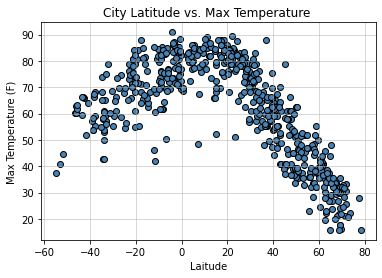

In [25]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature ")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

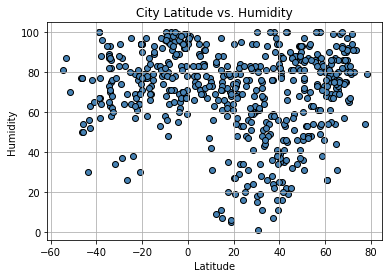

In [26]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

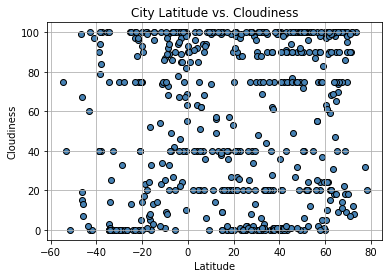

In [27]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

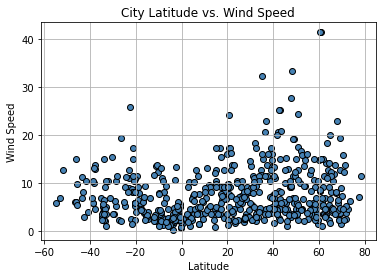

In [28]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [44]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [45]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]>0]
Southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9020533514683723


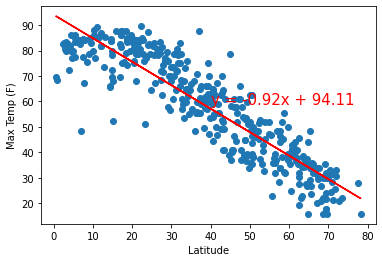

None


In [48]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6485208281300122


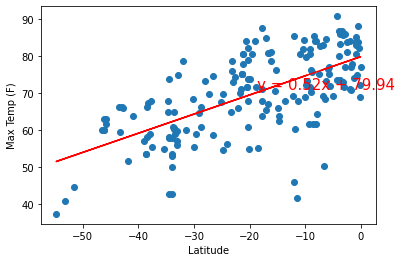

None


In [49]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15316908621781133


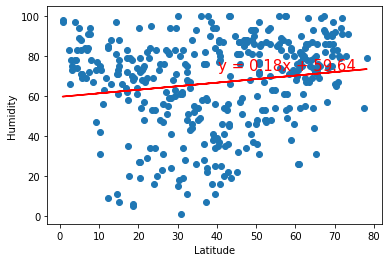

None


In [50]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26013308203248453


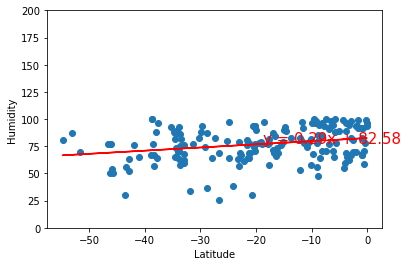

None


In [51]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13202392509937522


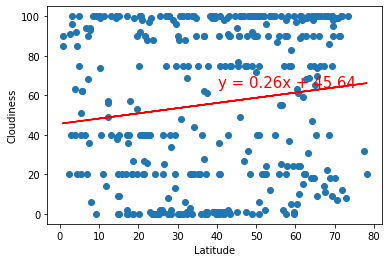

None


In [52]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32626084572651104


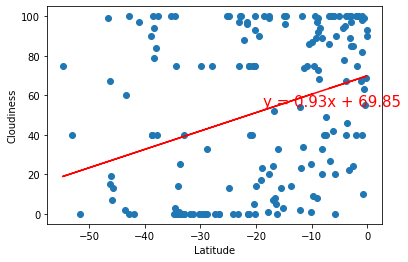

None


In [53]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10234646038251294


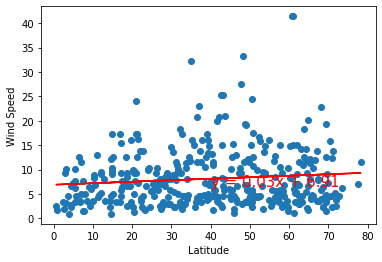

None


In [54]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3252876112802316


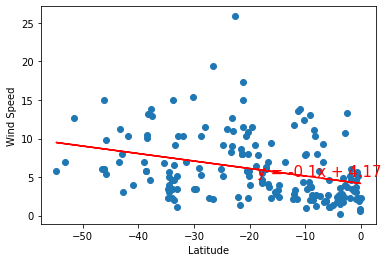

None


In [55]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))